<a href="https://colab.research.google.com/github/Connorb146/Comp-Phy-1/blob/main/Worksheet_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

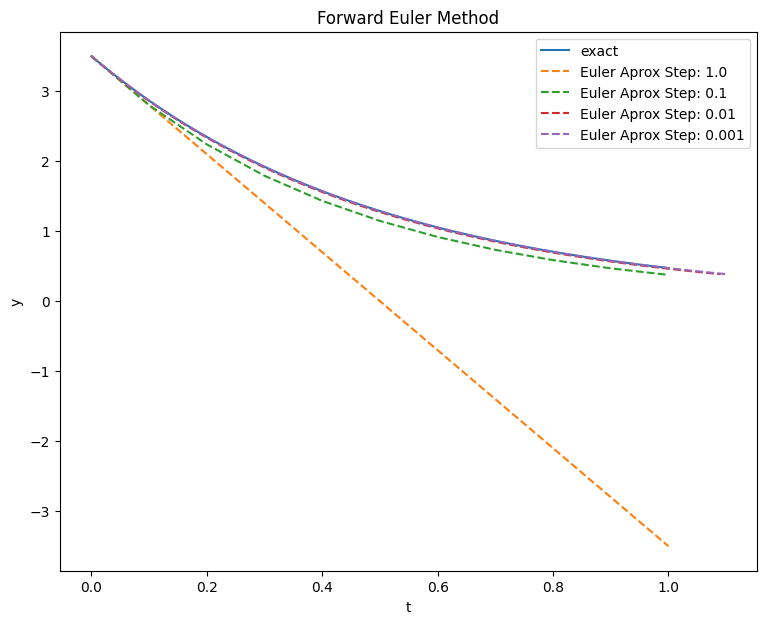

In [ ]:
import numpy as np
import matplotlib.pyplot as plt


#defining fucntion

def dydt(y,t):
  return -2*y

y0 = 3.5

def euler_method(y0, dydt, t):
  f = np.zeros(len(t)) #array to store, length of t
  f[0] = y0 #ivp

  for i in range(1, len(t)):
    delta_t = t[i] - t[i-1]
    f[i] = f[i-1] + dydt(f[i-1], t[i-1]) * delta_t #equation given which takes dydt times delta t + y-1
  return f

plt.figure(figsize=(9,7))
ax = plt.subplot(111)
t_actual = np.arange(0,1,0.001) # making a very acurate exact plot
plt.plot(t_actual, 3.5*np.exp(-2*t_actual), r'-', label='exact')


#step sizes, over the time interval 0-1
Step_array = np.array([1,.1,.01,.001])
for step in Step_array:

  t = np.arange(0,1+.1,step) #I had to add .1 for the 1 step size to be shown graphically


  plt.plot(t, euler_method(y0, dydt, t), '--', label=f'Euler Aprox Step: {step}')
  plt.title("Forward Euler Method")

plt.title("Forward Euler Method")
plt.xlabel('t')
plt.ylabel('y', rotation = 0)
plt.legend()
plt.show()

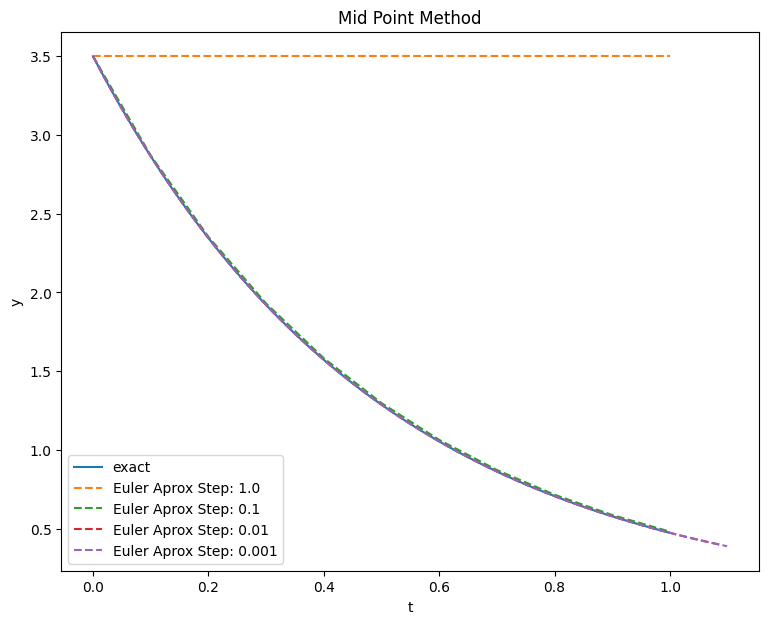

In [ ]:
#question 2
import numpy as np
import matplotlib.pyplot as plt


#defining fucntion

def dydt(y,t):
  return -2*y

y0 = 3.5

def mid_point_method(y0, dydt, t):
  f = np.zeros(len(t)) #array to store, length of t
  f[0] = y0 #ivp

  for i in range(1, len(t)):
    delta_t = t[i] - t[i-1]


    f_1 = f[i-1] + dydt(f[i-1], t[i-1]) * (delta_t/2) #adding mid point

    f[i] = f[i-1] + dydt(f_1, t[i-1]) * delta_t #equation given which takes dydt times delta t + y-1
  return f

plt.figure(figsize=(9,7))
ax = plt.subplot(111)
t_actual = np.arange(0,1,0.001) # making a very acurate exact plot
plt.plot(t_actual, 3.5*np.exp(-2*t_actual), r'-', label='exact')


#step sizes, over the time interval 0-1
Step_array = np.array([1,.1,.01,.001])
for step in Step_array:

  t = np.arange(0,1+.1,step) #I had to add .1 for the 1 step size to be shown graphically


  plt.plot(t, mid_point_method(y0, dydt, t), '--', label=f'Euler Midpoint Step: {step}')
  plt.title("Mid Point Method")
  plt.xlabel('t')

plt.title("Mid Point Method")
plt.xlabel('t')
plt.ylabel('y', rotation = 0)
plt.legend()
plt.show()

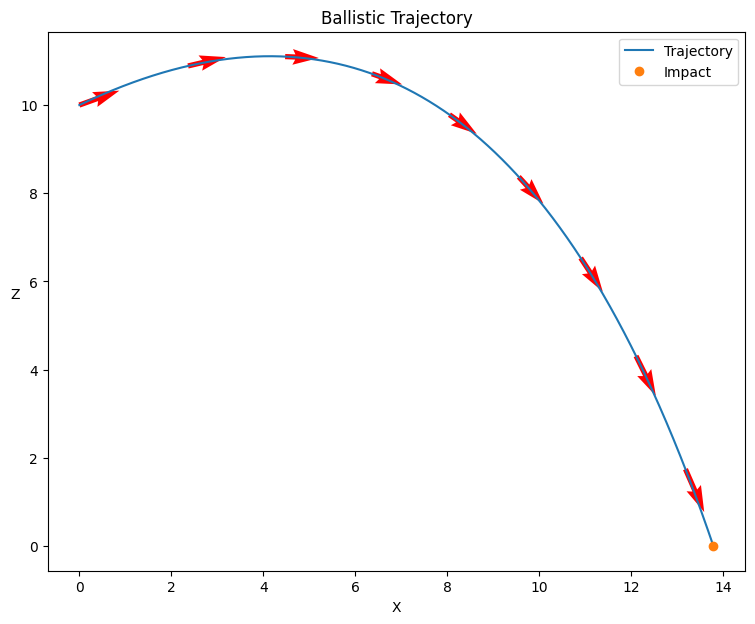

Object hits the ground at x = 13.796048152787092 meters 


In [42]:

#problem 3
import numpy as np
import matplotlib.pyplot as plt


#making constants v and g can change for problems
g = 9.81 #gravity
nu = 0.45 #drag

#defining fucntion
def dxdt(v_x,t):
  return v_x

def dv_xdt(v_x,t):
  return -nu * v_x

def dzdt(v_z,t):
  return v_z

def dv_zdt(v_z,t):
  return -nu * v_z  -g



def mid_point_method(x_0,z_0,vx_0,vz_0,t):
  #arrays for points
  xpoint = np.zeros(len(t))
  zpoint = np.zeros(len(t))
  vxpoint = np.zeros(len(t))
  vzpoint = np.zeros(len(t))

  #initial conditions
  xpoint[0] = x_0 #x position
  zpoint[0] = z_0 #z postion
  vxpoint[0] = vx_0 #x velocity
  vzpoint[0] = vz_0 #z velocity

  for i in range(1, len(t)):

    delta_t = t[i] - t[i-1]

    #getting all midpoints
    x_mid = xpoint[i-1] + dxdt(vxpoint[i-1], t[i-1]) * (delta_t/2)

    z_mid = zpoint[i-1] + dzdt(vzpoint[i-1], t[i-1]) * (delta_t/2)

    vx_mid = vxpoint[i-1] + dv_xdt(vxpoint[i-1], t[i-1]) * (delta_t/2)

    vz_mid = vzpoint[i-1] + dv_zdt(vzpoint[i-1], t[i-1]) * (delta_t/2)

    #derivative mid point method
    xpoint[i] = xpoint[i-1] + dxdt(vx_mid, t[i-1]) * delta_t

    zpoint[i] = zpoint[i-1] + dzdt(vz_mid, t[i-1]) * delta_t

    vxpoint[i] = vxpoint[i-1] + dv_xdt(vx_mid, t[i-1]) * delta_t

    vzpoint[i] =vzpoint[i-1] + dv_zdt(vz_mid, t[i-1]) * delta_t

    if zpoint[i] <= 0:
      return xpoint[:i+1], zpoint[:i+1] #retruning points whwn z reaches 0
  return xpoint, zpoint #returning both x and z to plot

#setting any initial conditions, these can be changed to whatever
x_0 = 0
z_0 = 10
vx_0 = 10
vz_0 = 5

t = np.arange(0,20,0.001) #time steps, with very accurate .001 step

#calling mid
xpoint, zpoint = mid_point_method(x_0,z_0,vx_0,vz_0, t)
#plotting
plt.figure(figsize=(9,7))
ax = plt.subplot(111)
plt.plot(xpoint, zpoint , '-', label='Trajectory')
plt.plot(xpoint[-1], zpoint[-1], 'o', label='Impact') #plotting ground contact

#adding directional arrows
X = xpoint[::250] #arrows every 250 points #also with magnitude
Y = zpoint[::250]
I = np.gradient(X) #making arrows directional using NP.gradient
J = np.gradient(Y)

plt.quiver(X, Y, I, J, angles = 'xy', color = 'red' )

plt.title("Ballistic Trajectory")
plt.xlabel('X')
plt.ylabel('Z', rotation = 0)
plt.legend()
plt.show()
print(f"Object hits the ground at x = {xpoint[-1]} meters ")

[2, 1.5, 1.25, 1.125, 1.0625, 1.03125, 1.015625, 1.0078125, 1.00390625, 1.001953125, 1.0009765625, 1.00048828125, 1.000244140625, 1.0001220703125, 1.00006103515625, 1.000030517578125, 1.0000152587890625, 1.0000076293945312, 1.0000038146972656, 1.0000019073486328, 1.0000009536743164, 1.0000004768371582, 1.000000238418579, 1.0000001192092896, 1.0000000596046448, 1.0000000298023224, 1.0000000149011612, 1.0000000074505806, 1.0000000037252903, 1.0000000018626451, 1.0000000009313226, 1.0000000004656613, 1.0000000002328306, 1.0000000001164153, 1.0000000000582077, 1.0000000000291038, 1.000000000014552, 1.000000000007276, 1.000000000003638, 1.000000000001819, 1.0000000000009095, 1.0000000000004547, 1.0000000000002274, 1.0000000000001137, 1.0000000000000568, 1.0000000000000284, 1.0000000000000142, 1.000000000000007, 1.0000000000000036, 1.0000000000000018, 1.0000000000000009, 1.0000000000000004, 1.0000000000000002, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.

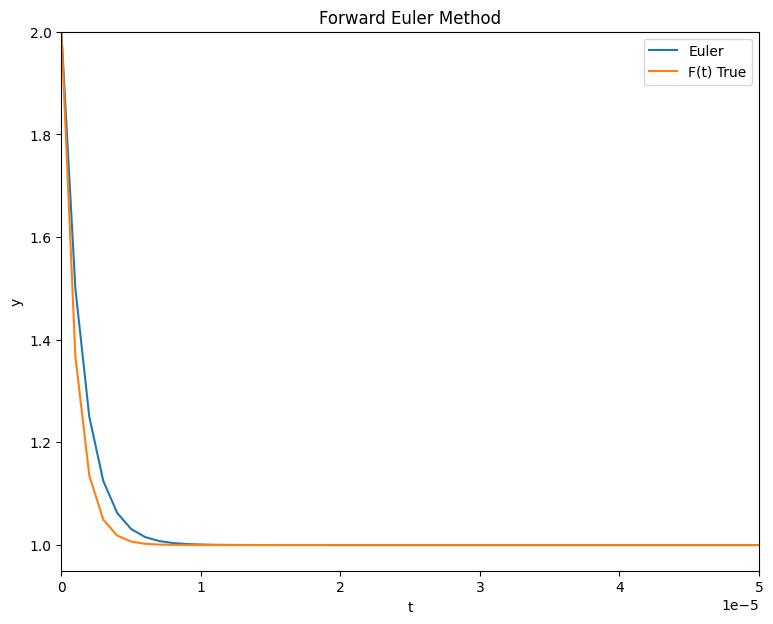

In [43]:
#question 4
import numpy as np
import matplotlib.pyplot as plt
#ODE using implicit Euler method

# Initial coniditons

f_0 = 2
delta_t = 0.000001 #very small so doesnt blow up
T = .1    #total time
steps = int(T/delta_t) #number of steps
t = np.linspace(0,T,steps) #time array

f_vals = [] #array to store after loop iteration
f_vals.append(f_0) #initial condition

for i in range(1,len(t)): # start at 1 so i-1 is not negative
  #equation
  f_it = (10**6 * delta_t + f_vals[i-1]) / (1 + 10**6 * delta_t) #note f[i-1] is using prev step
  f_vals.append(f_it)

f_true = (1 - np.exp(-10**6 * t ) + f_0 * np.exp(-10**6 * t))
#printing to see behavior analytically
print(f_vals)
print(f_true)
#plotting
plt.figure(figsize=(9,7))
plt.plot(t, f_vals, '-', label='Euler')
plt.plot(t, f_true, '-', label='F(t) True')
plt.xlim(0,0.00005) #had to zoom in on this region in order to see region as len was very large
plt.ylim(.95,2)
plt.title("Forward Euler Method")
plt.xlabel('t')
plt.ylabel('y')
plt.legend()
plt.show()